## k-近邻算法概述
k-近邻算法的工作原理是：
> 存在一个样本数据集，也即训练集，其中的每个样本数据对存在一个对应标签，也即样本的分类。当输入没有标签的新样本后，我们通过将新数据的每个特征与样本数据集中对应的特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。通常做法是提取特征向量最相近的前k个数据，取其中出现次数最多的分类，作为输入新样本的分类标签

用一个简单的例子来描述一下k-近邻算法的一般流程
### 准备用pyhton导入数据
创建一个名为kNN的Python模块，在kNN.py中增加下列代码：

In [71]:
from numpy import *
import operator
def createDataSet():
    """
    以四个点(1,1.1),(1,1),(0,0),(0,0.1)为例，其标签分分别是'A','B','C','D'
    """
    group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels

In [73]:
group,labels = createDataSet()
print(group)
print(labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


### 实施kNN算法
kNN算法的伪代码如下:
1. 计算已知类别数据集中的点与当前点之间的距离
2. 按照距离递增次序排序
3. 选取与当前点距离最小的k个点
4. 确定当前k个点所在类别的出现频率
5. 返回前k个点出现频率最高的类别作为当前点的预测分类

pyhton函数classify0如下所示：

In [77]:
def classify0(inX,dataSet,labels,k):
    """
    输入参数为inX（待分类的数据特征向量），dataSet(训练数据多个特征向量构成的矩阵)，labels(训练数据特征向量对应的标签向量)，k（k值）
    返回为inX的预估的标签
    """
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1))-dataSet  # 新数据与训练数据作差
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis = 1)  # 对差平方矩阵进行每行求和
    distances = sqDistances**0.5       # 开平方根，为新数据向量与训练数据向量的距离
    sortedDistanceIndices = distances.argsort()  #按照距离从小到大排序，返回下标向量
    classCount = {}
    for i in range(k):
        # 统计前k个点对应的标签，插入classCount字典中
        voteIlabel = labels[sortedDistanceIndices[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse=True)  # 利用字典中的value值进行从大到小的排序
    return sortedClassCount[0][0]

上述程序使用欧式距离公式，计算两个向量$xA$和$xB$之间的距离:
    $$d=\sqrt {(xA_0-xB_0)^2+(xA_1-xB_1)^2}$$
对数据点[0,0]进行分类，它实际上属于B类（画个图就知道了）。运行下列代码，确实是B

In [78]:
classify0([0,0],group,labels,3)

'B'

## 使用k近邻算法改进约会网站的配对效果
海伦将约会网站上的约会对象分为三种人，
- 不喜欢的人
- 魅力一般的人
- 极具魅力的人
我们需要根据已有数据采用k近邻算法，来帮助海伦将约会对象划分到确切的分类中。
### 大致步骤
1. 收集数据：获得海伦给定的对象数据特征和分类标签
2. 准备数据：使用pyhton解析文本文件
3. 分析数据：使用matplotlib画二维扩散图
4. 训练算法：k近邻算法用不着训练数据
5. 测试算法：使用海伦提供的部分数据作为测试样本
6. 使用算法：产生简单的命令行程序，使得海伦通过输入一些数据来判断对方是否为自己喜欢的类型
### 准备数据
下载海伦提供的数据。查看数据，可以看出，每个样本数据占据一行，每一行有四列，前三列是3种特征：
- 每年获得的飞行常客里程数
- 玩视频游戏所消耗的时间百分比
- 每周消耗的冰淇淋公升数
第四列是海伦给这个样本定义的标签，有'largeDoses','smallDoses','didntLike'

In [ ]:
!wget https://github.com/pbharrin/machinelearninginaction/raw/master/Ch02/datingTestSet.txt

In [ ]:
!cat datingTestSet.txt

在kNN.py中创建名为file2matrix的函数，以此来处理输入格式问题。file2matrix输入文件名，返回特征数据矩阵和标签向量

In [66]:
def file2matrix(filename):
    """
    根据文件名读取数据，返回特征数据矩阵和标签向量
    """
    dic = {'didntLike':1,'smallDoses':2,'largeDoses':3}
    fr = open(filename)
    arrayOLines = fr.readlines() # 以列表形式存储文本数据，列表元素为字符串
    numberOfLines = len(arrayOLines)
    returnMat = np.zeros((numberOfLines,3)) # 返回的特征数据矩阵
    classLabelVector = []     # 返回的标签向量
    index = 0
    for line in arrayOLines:
        line = line.strip() # remove leading and trailing whitespace
        listFromLine = line.split('\t')
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(dic[listFromLine[-1]])
        index+=1
    return returnMat,classLabelVector

在执行上述代码后，可调用file2matrix函数将文件'datingTestSet.txt'导入到内存中

In [49]:
datingDataMat,datingLabels = file2matrix('datingTestSet.txt')

### 分析数据
利用Matplotlib制作原始数据的散点图

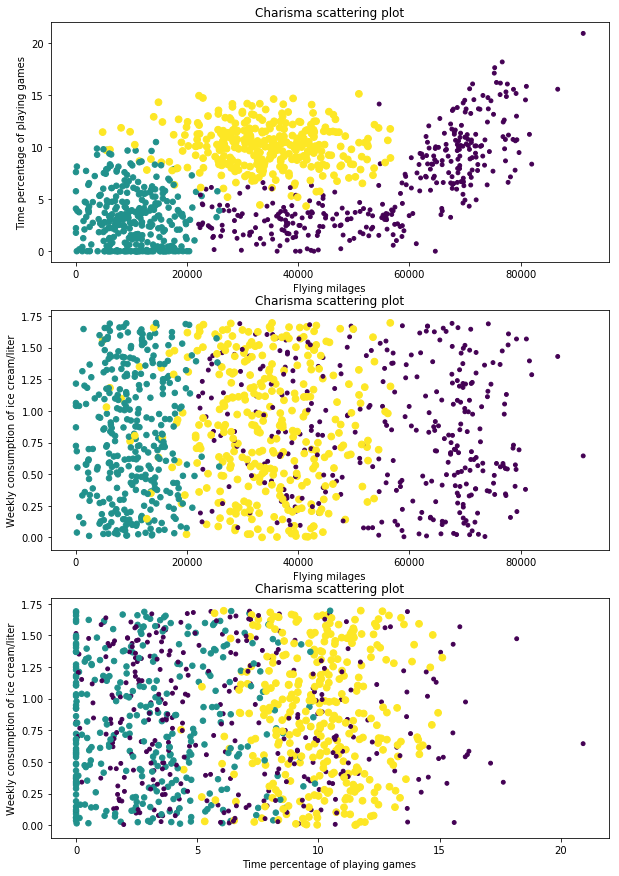

In [45]:
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,15))
ax1 = fig.add_subplot(311) # 设定figure里面有多少个子图和子图位置
ax1.scatter(datingDataMat[:,0],datingDataMat[:,1],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
ax1.set_title("Charisma scattering plot")
ax1.set_xlabel("Flying milages")
ax1.set_ylabel("Time percentage of playing games")

ax2 = fig.add_subplot(312) # 设定figure里面有多少个子图和子图位置
ax2.scatter(datingDataMat[:,0],datingDataMat[:,2],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
ax2.set_title("Charisma scattering plot")
ax2.set_xlabel("Flying milages")
ax2.set_ylabel("Weekly consumption of ice cream/liter")
ax3 = fig.add_subplot(313) # 设定figure里面有多少个子图和子图位置
ax3.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*np.array(datingLabels),15.0*np.array(datingLabels))
ax3.set_title('Charisma scattering plot')
ax3.set_xlabel('Time percentage of playing games')
ax3.set_ylabel('Weekly consumption of ice cream/liter')
plt.show()

### 准备数据：归一化数值
显然，因为飞行常客里程数远远大于玩视频游戏时间占比与每周消费冰淇淋公升数，而海伦认为这三种特征是同样重要的，所以需要对特征树进行归一化处理。通过下面公式将任意范围的特征值转为0到1区间的值：
$$newValue = (oldValue-min)/(max-min)$$
下面是归一化特征值的代码

In [57]:
def autoNorm(dataSet):
    minVals = dataSet.min(0) # 对每一列求最小值，得到一个有三个元素的向量
    maxVals = dataSet.max(0) # 对每一列求最大值，得到一个有三个元素的向量
    ranges = maxVals-minVals # 获得每一列最大值与最小值的差值
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]  #数据集有多少行
    normDataSet = dataSet - np.tile(minVals,(m,1))
    normDataSet = normDataSet/tile(ranges,(m,1))
    return normDataSet,ranges,minVals

In [58]:
normMat,ranges,minVals = autoNorm(datingDataMat)

In [61]:
print(normMat[0:5])
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 [0.82320073 0.62848007 0.25248929]
 [0.42010233 0.07982027 0.0785783 ]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


### 测试算法
为了测试分类器效果，我们定义了一个datingClassTest函数，该函数是自包含的，选用海伦提供数据的前10%作为测试数据，后90%作为训练集数据。代码如下：

In [82]:
def datingClassTest():
    hoRatio = 0.10
    datingDataMat,datingDataLabels = file2matrix('datingTestSet.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    numTestVecs = int(m*hoRatio)
    errCoount = 0    # 预测错误向量个数
    for i in range(numTestVecs):
        # 遍历所有的测试向量
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],datingLabels[numTestVecs:m],3)
        # print("the classifier came back with:%d, the real answer is:%d"%(classifierResult,datingLabels[i]))
        if classifierResult!=datingLabels[i]:
            errCoount += 1
    print("the total error rate is: %f"%(errCoount/float(numTestVecs)))

In [83]:
datingClassTest()

the total error rate is: 0.050000


### 使用算法：构建完整系统
设计一个函数，能够询问约会对象的特征数据，然后给出预估的分类

In [84]:
def classifyPerson():
    resultList = ['not at all','in small doses','in large doses']
    percentageTats = float(input("percentage of time spent in playing video games?"))
    ffMiles = float(input("frequent flier miles earned each year?"))
    icecream = float(input("liters of ice cream cosumed each week?"))
    datingDataMat,datingLabels = file2matrix('datingTestSet.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    inArr = array([ffMiles,percentageTats,icecream])
    classifierResult = classify0((inArr-minVals)/ranges,normMat,datingLabels,3)
    print("You will propably like this person %s"%resultList[int(classifierResult)-1])

In [85]:
classifyPerson()

percentage of time spent in playing video games?10
frequent flier miles earned each year?10000
liters of ice cream cosumed each week?0.5
You will propably like this person in small doses


In [ ]:
以上让人觉得十分容易看懂，事实上k-近邻算法本身就是一个非常简单的算法。接下来看看，如何在二进制存储的图像数据上使用kNN。

## 手写识别数字
需要识别的数字已经通过软件转成宽高32x32的黑白图像，这里直接使用图像的文本格式

### 准备数据:将图像转化为测试向量
执行以下指令，获取并解压数据文件，文件夹中包含两个文件夹trainingDigits和testDigits，分别对应训练数据和测试数据

In [ ]:
!wget https://github.com/pbharrin/machinelearninginaction/raw/master/Ch02/digits.zip
!unzip digits.zip

首先编写一个函数根据手写数字的文件名读入数据将32x32的矩阵转成一个1x1024的向量

In [96]:
def img2vector(filename):
    """
    参数为一个图像文本文件的名字
    返回1x1024的向量
    """
    returnVect = zeros((1,1024))
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline()
        for j in range(32):
            returnVect[0,32*i+j] = int(lineStr[j])
    return returnVect

In [97]:
print(img2vector("testDigits/0_0.txt"))

[[0. 0. 0. ... 0. 0. 0.]]


### 测试算法：使用k近邻算法实现手写数字的识别

下面实现一个函数classifyDigitTest，输入数字图像转化来的1x1024向量，

In [116]:
from os import listdir
def classifyDigitTest():
    # 首先列出trainingDigits下的所有文件名，文件数为m
    # 根据trainingDigits下的所有文件构造m*1024的特征矩阵和，m*1的标签向量
    # 列出testDigits下的所有文件名，文件数为testN
    # 对testDigits文件夹下的进行循环判断，以获得算法的手写数字识别错误率
        # 调用classify0获得digitVect的结果标签
        # 有文件名名可获得digitVect的真实标签，对比，若不等errorCount++
    # 获得手写识别错误率
    trainingFiles = listdir('trainingDigits')
    m = len(trainingFiles)
    trainingDataMat = np.zeros((m,1024))
    trainingLabelsVect = []
    for i in range(m):
        trainingFileName = trainingFiles[i]
        realLabel = int(trainingFileName.split('.')[0].split('_')[0])
        trainingDataMat[i,:] = img2vector('trainingDigits/'+trainingFileName) # 构造特征矩阵第i行
        trainingLabelsVect.append(realLabel)
    testFiles = listdir('testDigits')
    testN = len(testFiles)
    errCount = 0.0
    for i in range(testN):
        testFileName = testFiles[i]
        testDataVect = img2vector('testDigits/'+testFileName)  # 获得测试文件的特征向量
        testRealLabel = int(testFileName.split('.')[0].split('_')[0]) # 获得测试文件名中的数据标签
        testLabel = classify0(testDataVect,trainingDataMat,trainingLabelsVect,3) # 采用k近邻算法估计测试文件的标签
        # print("test data file:%s,predicted label:%s,real label:%s"%(testFileName,testLabel,testRealLabel))
        if testLabel!=testRealLabel:
            errCount+=1
    print("model accuracy:%.5f"%(1-errCount/testN))

In [117]:
start = tiem
classifyDigitTest()


model accuracy:0.99


实际上，使用这个算法效率太低，而且训练集数据越大，耗时越多，我们需要为每个测试向量做m次距离计算(m是训练集样本数)，每个距离计算包括1024个维度的浮点数计算。k近邻算法没有训练出一个模型出来，而是直接将输入与所有的训练数据一一比较。